# k-NN Project 2: Dating Classification

The data can be downloaded from {Download}`here<./assests/datasets/datingTestSet2.txt>`.


## Background
Helen dated several people and rated them using a three-point scale: 3 is best and 1 is worst. She also collected data from all her dates and recorded them in the file attached. These data contains 3 features:

- Number of frequent flyer miles earned per year
- Percentage of time spent playing video games
- Liters of ice cream consumed per week

We would like to predict her ratings of new dates when we are given the three features. 

The data contains four columns, while the first column refers to `Mileage`, the second `Gamingtime`, the third `Icecream` and the fourth `Rating`. 

## Look at Data

We first load the data and store it into a DataFrame.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./assests/datasets/datingTestSet2.txt', sep='\t', header=None)
df.head()

,0,1,2,3
0,40920,8.326976,0.953952,3
1,14488,7.153469,1.673904,2
2,26052,1.441871,0.805124,1
3,75136,13.147394,0.428964,1
4,38344,1.669788,0.134296,1


To make it easier to read, we would like to change the name of the columns.

In [2]:
df = df.rename(columns={0: "Mileage", 1: "Gamingtime", 2: 'Icecream', 3: 'Rating'})
df.head()

,Mileage,Gamingtime,Icecream,Rating
0,40920,8.326976,0.953952,3
1,14488,7.153469,1.673904,2
2,26052,1.441871,0.805124,1
3,75136,13.147394,0.428964,1
4,38344,1.669788,0.134296,1


Since now we have more than 2 features, it is not suitable to directly draw scatter plots. We use `seaborn.pairplot` to look at the pairplot. From the below plots, before we apply any tricks, it seems that `Milegae` and `Gamingtime` are better than `Icecream` to classify the data points. 

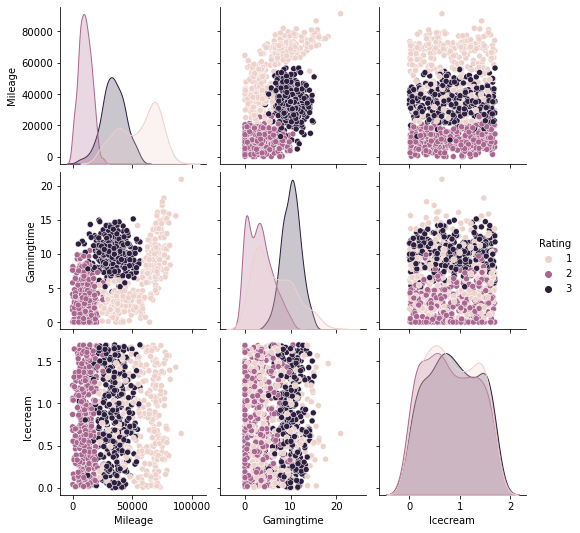

In [3]:
import seaborn as sns
sns.pairplot(data=df, hue='Rating')

## Applying kNN

Similar to the previous example, we will apply both methods for comparisons. 

In [4]:
from sklearn.model_selection import train_test_split
from assests.codes.knn import encodeNorm
X = np.array(df[['Mileage', 'Gamingtime', 'Icecream']])
y = np.array(df['Rating'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40, stratify=y)

X_train_norm, parameters = encodeNorm(X_train)
X_test_norm, _ = encodeNorm(X_test, parameters=parameters)

In [5]:
# Using our codes.
from assests.codes.knn import classify_kNN

n_neighbors = 10
y_pred = np.array([classify_kNN(row, X_train_norm, y_train, k=n_neighbors)
                   for row in X_test_norm])

acc = np.mean(y_pred == y_test)
print(acc)

0.93


In [6]:
# Using sklearn.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

steps = [('scaler', MinMaxScaler()),
         ('knn', KNeighborsClassifier(n_neighbors, weights="uniform",
                                      metric="euclidean", algorithm='brute'))]
pipe = Pipeline(steps=steps)
pipe.fit(X_train, y_train)
y_pipe = pipe.predict(X_test)
print(accuracy_score(y_pipe, y_test))

0.93


## Choosing `k` Value
Similar to the previous section, we can run tests on `k` value to choose one to be used in our model using `GridSearchCV`.

In [7]:
from sklearn.model_selection import GridSearchCV, cross_val_score
n_list = list(range(1, 101))
parameters = dict(knn__n_neighbors=n_list)
clf = GridSearchCV(pipe, parameters)
clf.fit(X, y)
print(clf.best_estimator_.get_params()["knn__n_neighbors"])

4


From this result, in this case the best `k` is `4`. The corresponding cross-validation score is computed below.

In [8]:
cv_scores = cross_val_score(clf.best_estimator_, X, y, cv=5)
print(np.mean(cv_scores))

0.952
